<img src="./src/header.png">


----

# Moduł 6 - Pandas

---

* Selekcja i filtracja danych
* Grupowanie danych
* Uzupełnianie brakujących danych
* Tworzenie prostych wykresów

<center><img src="https://raw.githubusercontent.com/earthinversion/earthinversion-images/main/images/pandas-python.png" width = "30%"></center>

## Pandas

-----

Pandas "Python Data Analysis Library" to biblioteka będąca najszerzej wykorzystywanym narzędziem w analizie danych w Pythonie.

Dlaczego jest taka popularna?

    Potrafi wczytać dane z plików (CSV, TSV czy SQL) i stworzyć z nich Pythonowy obiekt w formie tabeli
    
    Wprowadza funkcjonalności statystyczne na tabelach znane z oprogramowania jak Excel czy (i jest szybsza)
    
    Jest odpowiednikiem SQL w Pythonie
   
Pandas jest oparty na NumPy <b>(PRĘDKOŚĆ!)</b>

## Pandas a Numpy

-----

Podczas gdy pandas przejmuje wiele idiomów/standardów kodowania z NumPy, największą różnicą jest to, że
pandas jest przeznaczony do pracy z danymi tabelarycznymi lub heterogenicznymi. NumPy, dla porównania, najlepiej nadaje się do pracy z jednorodnymi danymi.
najlepiej nadaje się do pracy z jednorodnymi danymi liczbowymi w postaci tablic.

<center><img src="https://media.geeksforgeeks.org/wp-content/uploads/finallpandas.png" width = "80%"></center>

<center><img src="https://media.geeksforgeeks.org/wp-content/cdn-uploads/creating_dataframe1.png" width = "100%"></center>

## Import pandasa

-----



In [34]:
import pandas as pd
import numpy as np

## Typy danych pandas 

-----------------

- Serie (Series)
- Ramki (DataFrame)

## Serie

--------

To jednowymiarowy obiekt podobny do wektora, listy lub kolumny w tabeli.

```
s = pd.Series(data, index = index)
```

Danymi mogą być:
- Sekwencja
- Słownik
- Wektor Numpy
- Dane z pliku zewnętrznego*

## Serie

--------

Wygenerujmy serie

In [35]:
seria = pd.Series([34, "GEODEZJA", 'Człowiek z marmuru', True, 3.23]) #różne typy danych!
seria

0                    34
1              GEODEZJA
2    Człowiek z marmuru
3                  True
4                  3.23
dtype: object

Automatyczna indeksacja to "range" rozpoczynający się od 0:

## Serie

--------

Wygenerujmy serie z indexem

In [36]:
seria = pd.Series([34, "GEODEZJA", 'Człowiek z marmuru', True, 3.23], 
                  index = ['A', 2, 3, "magnez", 5.5])
seria

A                         34
2                   GEODEZJA
3         Człowiek z marmuru
magnez                  True
5.5                     3.23
dtype: object

## Serie

--------

Wygenerujmy serie ze słownika

In [66]:
seria = pd.Series({"Film": "Człowiek z marmuru", 'Pi': 3.14}) #ze słownika
seria

Film    Człowiek z marmuru
Pi                    3.14
dtype: object

In [38]:
seria["Film"]

'Człowiek z marmuru'

## Serie

--------
Seria jest jak słownik, z którego możemy pozyskać wartości na podstawie jego indexu

In [39]:
seria[0]

'Człowiek z marmuru'

## Serie

--------
Ale możemy też stosować wycinki jak z listy

In [48]:
s=pd.Series(np.random.randint(0,10,5), index=list('abcde'))
s[1:]

b    5
c    3
d    2
e    2
dtype: int32

## Serie

--------

Możemy traktować je jak wektory i korzystać z opcji manipulacji

In [49]:
s + s

a    10
b    10
c     6
d     4
e     4
dtype: int32

In [50]:
s * 3

a    15
b    15
c     9
d     6
e     6
dtype: int32

## Atrybuty

----

In [67]:
seria.size

2

In [68]:
seria.index

Index(['Film', 'Pi'], dtype='object')

In [57]:
help(seria)

Help on Series in module pandas.core.series object:

class Series(pandas.core.base.IndexOpsMixin, pandas.core.generic.NDFrame)
 |  Series(data=None, index=None, dtype=None, name=None, copy=False, fastpath=False)
 |  
 |  One-dimensional ndarray with axis labels (including time series).
 |  
 |  Labels need not be unique but must be a hashable type. The object
 |  supports both integer- and label-based indexing and provides a host of
 |  methods for performing operations involving the index. Statistical
 |  methods from ndarray have been overridden to automatically exclude
 |  missing data (currently represented as NaN).
 |  
 |  Operations between Series (+, -, /, *, **) align values based on their
 |  associated index values-- they need not be the same length. The result
 |  index will be the sorted union of the two indexes.
 |  
 |  Parameters
 |  ----------
 |  data : array-like, Iterable, dict, or scalar value
 |      Contains data stored in Series.
 |  
 |      .. versionchanged::

## Metody

----

In [69]:
seria.to_list()

['Człowiek z marmuru', 3.14]

In [70]:
seria.to_dict()

{'Film': 'Człowiek z marmuru', 'Pi': 3.14}

In [72]:
seria = pd.Series(np.arange(5),dtype=int)

In [74]:
seria

0    0
1    1
2    2
3    3
4    4
dtype: int32

In [73]:
seria.astype(float)

0    0.0
1    1.0
2    2.0
3    3.0
4    4.0
dtype: float64

## DataFrame

------

DataFrame to dwuwymiarowy typ danych - tabela, składająca się z wierszy i kolumn. Można ją sobie wyobrazić jako zestaw Serii, które mają wspólny indeks i unikalną nazwę.

```
df = pd.DataFrame(data, index = index, columns = columns)
```

Danymi mogą być:
- Sekwencja
- Słownik
- Macierz Numpy
- Seria danych pandas
- inny DataFrame
- Dane z pliku zewnętrznego*

## DataFrame

------

DataFrame ze słownika

In [15]:
dane = {"raz": np.random.randint(0,10,10),
       "dwa": np.random.randint(10,20,10),
       "trzy": np.random.randint(100,110,10)}
los = pd.DataFrame(dane)
los

,raz,dwa,trzy
0,7,16,105
1,7,19,106
2,3,19,105
3,6,19,101
4,6,19,106
5,6,15,102
6,7,16,100
7,5,13,101
8,4,13,101
9,2,15,106


## DataFrame

------

DataFrame z pliku zewnętrznego

In [16]:
z_csv = pd.read_csv('temperatures.txt',nrows = 10,dtype=float)
z_csv

,#Source,Year,Month,Day,Mean
0,0.0,2016.0,12.0,6.0,0.7895
1,1.0,2016.0,12.0,6.0,0.8100
2,0.0,2016.0,11.0,6.0,0.7504
3,1.0,2016.0,11.0,6.0,0.9300
4,0.0,2016.0,10.0,6.0,0.7292
5,1.0,2016.0,10.0,6.0,0.8900
6,0.0,2016.0,9.0,6.0,0.8767
7,1.0,2016.0,9.0,6.0,0.8700
8,0.0,2016.0,8.0,6.0,0.8998
9,1.0,2016.0,8.0,6.0,0.9800


## Wczytywanie danych tekstowych

----

Uzyskanie dostępu do danych jest często pierwszym krokiem w procesie analizy danych. 

Pandas posiada bogatą bibliotekę funkcji, których zadaniem jest wczytywanie danych tabularycznych jako ramek danych.

Spośród nich wymienie tylko te najbardziej przydatne:
- `read_csv`
- `read_table`
- `read_fwf`
- `read_excel`
- `read_json`
- `read_pickle`

## Metody i atrybuty DataFrame'a

----

In [17]:
z_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   #Source  10 non-null     float64
 1   Year     10 non-null     float64
 2   Month    10 non-null     float64
 3   Day      10 non-null     float64
 4   Mean     10 non-null     float64
dtypes: float64(5)
memory usage: 528.0 bytes


## Metody i atrybuty DataFrame'a

----

In [18]:
z_csv.head(8)

,#Source,Year,Month,Day,Mean
0,0.0,2016.0,12.0,6.0,0.7895
1,1.0,2016.0,12.0,6.0,0.8100
2,0.0,2016.0,11.0,6.0,0.7504
3,1.0,2016.0,11.0,6.0,0.9300
4,0.0,2016.0,10.0,6.0,0.7292
5,1.0,2016.0,10.0,6.0,0.8900
6,0.0,2016.0,9.0,6.0,0.8767
7,1.0,2016.0,9.0,6.0,0.8700


## Metody i atrybuty DataFrame'a

----

In [19]:
z_csv.tail(8)

,#Source,Year,Month,Day,Mean
2,0.0,2016.0,11.0,6.0,0.7504
3,1.0,2016.0,11.0,6.0,0.9300
4,0.0,2016.0,10.0,6.0,0.7292
5,1.0,2016.0,10.0,6.0,0.8900
6,0.0,2016.0,9.0,6.0,0.8767
7,1.0,2016.0,9.0,6.0,0.8700
8,0.0,2016.0,8.0,6.0,0.8998
9,1.0,2016.0,8.0,6.0,0.9800


## Metody i atrybuty DataFrame'a

----

In [20]:
z_csv.describe()

,#Source,Year,Month,Day,Mean
count,10.000000,10.0,10.000000,10.0,10.000000
mean,0.500000,2016.0,10.000000,6.0,0.852560
std,0.527046,0.0,1.490712,0.0,0.080416
min,0.000000,2016.0,8.000000,6.0,0.729200
25%,0.000000,2016.0,9.000000,6.0,0.794625
50%,0.500000,2016.0,10.000000,6.0,0.873350
75%,1.000000,2016.0,11.000000,6.0,0.897350
max,1.000000,2016.0,12.000000,6.0,0.980000


## Metody i atrybuty DataFrame'a

----

In [21]:
z_csv.index

RangeIndex(start=0, stop=10, step=1)

In [22]:
z_csv.columns

Index(['#Source', 'Year', 'Month', 'Day', 'Mean'], dtype='object')

In [23]:
z_csv.values

array([[0.000e+00, 2.016e+03, 1.200e+01, 6.000e+00, 7.895e-01],
       [1.000e+00, 2.016e+03, 1.200e+01, 6.000e+00, 8.100e-01],
       [0.000e+00, 2.016e+03, 1.100e+01, 6.000e+00, 7.504e-01],
       [1.000e+00, 2.016e+03, 1.100e+01, 6.000e+00, 9.300e-01],
       [0.000e+00, 2.016e+03, 1.000e+01, 6.000e+00, 7.292e-01],
       [1.000e+00, 2.016e+03, 1.000e+01, 6.000e+00, 8.900e-01],
       [0.000e+00, 2.016e+03, 9.000e+00, 6.000e+00, 8.767e-01],
       [1.000e+00, 2.016e+03, 9.000e+00, 6.000e+00, 8.700e-01],
       [0.000e+00, 2.016e+03, 8.000e+00, 6.000e+00, 8.998e-01],
       [1.000e+00, 2.016e+03, 8.000e+00, 6.000e+00, 9.800e-01]])

## Metody i atrybuty DataFrame'a

----

In [24]:
z_csv.T

,0,1,2,3,4,5,6,7,8,9
#Source,0.0000,1.00,0.0000,1.00,0.0000,1.00,0.0000,1.00,0.0000,1.00
Year,2016.0000,2016.00,2016.0000,2016.00,2016.0000,2016.00,2016.0000,2016.00,2016.0000,2016.00
Month,12.0000,12.00,11.0000,11.00,10.0000,10.00,9.0000,9.00,8.0000,8.00
Day,6.0000,6.00,6.0000,6.00,6.0000,6.00,6.0000,6.00,6.0000,6.00
Mean,0.7895,0.81,0.7504,0.93,0.7292,0.89,0.8767,0.87,0.8998,0.98


## Metody i atrybuty DataFrame'a

----

Sortowanie

In [25]:
z_csv.sort_values(by = "Month", ascending = True)

,#Source,Year,Month,Day,Mean
8,0.0,2016.0,8.0,6.0,0.8998
9,1.0,2016.0,8.0,6.0,0.9800
6,0.0,2016.0,9.0,6.0,0.8767
7,1.0,2016.0,9.0,6.0,0.8700
4,0.0,2016.0,10.0,6.0,0.7292
5,1.0,2016.0,10.0,6.0,0.8900
2,0.0,2016.0,11.0,6.0,0.7504
3,1.0,2016.0,11.0,6.0,0.9300
0,0.0,2016.0,12.0,6.0,0.7895
1,1.0,2016.0,12.0,6.0,0.8100


## Metody i atrybuty DataFrame'a

----

Sortowanie

In [26]:
z_csv.sort_index(axis=1, ascending = False) #Kolumny

,Year,Month,Mean,Day,#Source
0,2016.0,12.0,0.7895,6.0,0.0
1,2016.0,12.0,0.8100,6.0,1.0
2,2016.0,11.0,0.7504,6.0,0.0
3,2016.0,11.0,0.9300,6.0,1.0
4,2016.0,10.0,0.7292,6.0,0.0
5,2016.0,10.0,0.8900,6.0,1.0
6,2016.0,9.0,0.8767,6.0,0.0
7,2016.0,9.0,0.8700,6.0,1.0
8,2016.0,8.0,0.8998,6.0,0.0
9,2016.0,8.0,0.9800,6.0,1.0


## Czy działanie metody zmienia dane ?

----


In [54]:
z_csv = pd.read_csv('temperatures.txt',nrows = 10,dtype=float)

In [55]:
z_csv

,#Source,Year,Month,Day,Mean
0,0.0,2016.0,12.0,6.0,0.7895
1,1.0,2016.0,12.0,6.0,0.8100
2,0.0,2016.0,11.0,6.0,0.7504
3,1.0,2016.0,11.0,6.0,0.9300
4,0.0,2016.0,10.0,6.0,0.7292
5,1.0,2016.0,10.0,6.0,0.8900
6,0.0,2016.0,9.0,6.0,0.8767
7,1.0,2016.0,9.0,6.0,0.8700
8,0.0,2016.0,8.0,6.0,0.8998
9,1.0,2016.0,8.0,6.0,0.9800


In [56]:
z_csv.sort_index(axis=1, ascending = False)
z_csv

,#Source,Year,Month,Day,Mean
0,0.0,2016.0,12.0,6.0,0.7895
1,1.0,2016.0,12.0,6.0,0.8100
2,0.0,2016.0,11.0,6.0,0.7504
3,1.0,2016.0,11.0,6.0,0.9300
4,0.0,2016.0,10.0,6.0,0.7292
5,1.0,2016.0,10.0,6.0,0.8900
6,0.0,2016.0,9.0,6.0,0.8767
7,1.0,2016.0,9.0,6.0,0.8700
8,0.0,2016.0,8.0,6.0,0.8998
9,1.0,2016.0,8.0,6.0,0.9800


## Czy działanie metody zmienia dane ?

----

Opcja 1 - Przypisz do tej samej zmiennej zwrócony obiekt

In [57]:
z_csv = z_csv.sort_index(axis=1, ascending = False)
z_csv

,Year,Month,Mean,Day,#Source
0,2016.0,12.0,0.7895,6.0,0.0
1,2016.0,12.0,0.8100,6.0,1.0
2,2016.0,11.0,0.7504,6.0,0.0
3,2016.0,11.0,0.9300,6.0,1.0
4,2016.0,10.0,0.7292,6.0,0.0
5,2016.0,10.0,0.8900,6.0,1.0
6,2016.0,9.0,0.8767,6.0,0.0
7,2016.0,9.0,0.8700,6.0,1.0
8,2016.0,8.0,0.8998,6.0,0.0
9,2016.0,8.0,0.9800,6.0,1.0


## Czy działanie metody zmienia dane ?

----

Opcja2 - atrybut `inplace`

In [121]:
z_csv = pd.read_csv('temperatures.txt',nrows = 10,dtype=float)

In [61]:
z_csv.sort_index(axis=1, ascending = False, inplace=True)
z_csv

,Year,Month,Mean,Day,#Source
0,2016.0,12.0,0.7895,6.0,0.0
1,2016.0,12.0,0.8100,6.0,1.0
2,2016.0,11.0,0.7504,6.0,0.0
3,2016.0,11.0,0.9300,6.0,1.0
4,2016.0,10.0,0.7292,6.0,0.0
5,2016.0,10.0,0.8900,6.0,1.0
6,2016.0,9.0,0.8767,6.0,0.0
7,2016.0,9.0,0.8700,6.0,1.0
8,2016.0,8.0,0.8998,6.0,0.0
9,2016.0,8.0,0.9800,6.0,1.0


## Selekcja danych

----

Kolumny/Serie

In [28]:
z_csv["Year"]

0    2016.0
1    2016.0
2    2016.0
3    2016.0
4    2016.0
5    2016.0
6    2016.0
7    2016.0
8    2016.0
9    2016.0
Name: Year, dtype: float64

In [30]:
type(z_csv["Year"])

pandas.core.series.Series

## Selekcja danych

----

Wiersze

In [31]:
z_csv.loc[2]


#Source       0.0000
Year       2016.0000
Month        11.0000
Day           6.0000
Mean          0.7504
Name: 2, dtype: float64

In [32]:
z_csv.loc[0:3]


,#Source,Year,Month,Day,Mean
0,0.0,2016.0,12.0,6.0,0.7895
1,1.0,2016.0,12.0,6.0,0.8100
2,0.0,2016.0,11.0,6.0,0.7504
3,1.0,2016.0,11.0,6.0,0.9300


## Selekcja danych

----

Kombinacja

In [33]:
z_csv["Year"][0:3] # najpierw separujemy Serie, a nastepnie część Serii


0    2016.0
1    2016.0
2    2016.0
Name: Year, dtype: float64

In [34]:
z_csv.loc[:,["Year", "#Source"]]


,Year,#Source
0,2016.0,0.0
1,2016.0,1.0
2,2016.0,0.0
3,2016.0,1.0
4,2016.0,0.0
5,2016.0,1.0
6,2016.0,0.0
7,2016.0,1.0
8,2016.0,0.0
9,2016.0,1.0


## Selekcja danych

----

Kombinacja

In [35]:
z_csv.loc[0:5,["Year",'Mean']]


,Year,Mean
0,2016.0,0.7895
1,2016.0,0.8100
2,2016.0,0.7504
3,2016.0,0.9300
4,2016.0,0.7292
5,2016.0,0.8900


## Selekcja danych

----

Kombinacja

In [36]:
z_csv.iloc[1]


#Source       1.00
Year       2016.00
Month        12.00
Day           6.00
Mean          0.81
Name: 1, dtype: float64

## Selekcja danych

----

Indexowanie logiczne: maski (Numpy)

In [77]:
(z_csv["Month"] < 10)


0    False
1    False
2    False
3    False
4    False
5    False
6     True
7     True
8     True
9     True
Name: Month, dtype: bool

In [37]:
z_csv[(z_csv["Month"] < 10) | (z_csv["Mean"] > .8)] #i lub


,#Source,Year,Month,Day,Mean
1,1.0,2016.0,12.0,6.0,0.8100
3,1.0,2016.0,11.0,6.0,0.9300
5,1.0,2016.0,10.0,6.0,0.8900
6,0.0,2016.0,9.0,6.0,0.8767
7,1.0,2016.0,9.0,6.0,0.8700
8,0.0,2016.0,8.0,6.0,0.8998
9,1.0,2016.0,8.0,6.0,0.9800


## Modyfikacja DataFrame'a

----


In [122]:
z_csv2 = z_csv.copy() # pamiętacie copy ?


In [123]:
z_csv2["Year"] = [2011]*10


In [124]:
z_csv2


,#Source,Year,Month,Day,Mean
0,0.0,2011,12.0,6.0,0.7895
1,1.0,2011,12.0,6.0,0.8100
2,0.0,2011,11.0,6.0,0.7504
3,1.0,2011,11.0,6.0,0.9300
4,0.0,2011,10.0,6.0,0.7292
5,1.0,2011,10.0,6.0,0.8900
6,0.0,2011,9.0,6.0,0.8767
7,1.0,2011,9.0,6.0,0.8700
8,0.0,2011,8.0,6.0,0.8998
9,1.0,2011,8.0,6.0,0.9800


In [125]:
z_csv

,#Source,Year,Month,Day,Mean
0,0.0,2016.0,12.0,6.0,0.7895
1,1.0,2016.0,12.0,6.0,0.8100
2,0.0,2016.0,11.0,6.0,0.7504
3,1.0,2016.0,11.0,6.0,0.9300
4,0.0,2016.0,10.0,6.0,0.7292
5,1.0,2016.0,10.0,6.0,0.8900
6,0.0,2016.0,9.0,6.0,0.8767
7,1.0,2016.0,9.0,6.0,0.8700
8,0.0,2016.0,8.0,6.0,0.8998
9,1.0,2016.0,8.0,6.0,0.9800


## Modyfikacja DataFrame'a

----


In [41]:
z_csv2.loc[0, "Year"] = 2016.0
z_csv2

,#Source,Year,Month,Day,Mean
0,0.0,2016,12.0,6.0,0.7895
1,1.0,2011,12.0,6.0,0.8100
2,0.0,2011,11.0,6.0,0.7504
3,1.0,2011,11.0,6.0,0.9300
4,0.0,2011,10.0,6.0,0.7292
5,1.0,2011,10.0,6.0,0.8900
6,0.0,2011,9.0,6.0,0.8767
7,1.0,2011,9.0,6.0,0.8700
8,0.0,2011,8.0,6.0,0.8998
9,1.0,2011,8.0,6.0,0.9800


## Modyfikacja DataFrame'a

----


In [42]:
z_csv2["New_Value"] = np.array([5] * len(z_csv2))
z_csv2

,#Source,Year,Month,Day,Mean,New_Value
0,0.0,2016,12.0,6.0,0.7895,5
1,1.0,2011,12.0,6.0,0.8100,5
2,0.0,2011,11.0,6.0,0.7504,5
3,1.0,2011,11.0,6.0,0.9300,5
4,0.0,2011,10.0,6.0,0.7292,5
5,1.0,2011,10.0,6.0,0.8900,5
6,0.0,2011,9.0,6.0,0.8767,5
7,1.0,2011,9.0,6.0,0.8700,5
8,0.0,2011,8.0,6.0,0.8998,5
9,1.0,2011,8.0,6.0,0.9800,5


## Modyfikacja DataFrame'a

----


In [43]:
z_csv2['Date'] = z_csv2['Year'].astype(str) + '-' + \
                 z_csv2['Month'].astype(int).astype(str) + '-' + \
                 z_csv2['Day'].astype(int).astype(str)
z_csv2

,#Source,Year,Month,Day,Mean,New_Value,Date
0,0.0,2016,12.0,6.0,0.7895,5,2016-12-6
1,1.0,2011,12.0,6.0,0.8100,5,2011-12-6
2,0.0,2011,11.0,6.0,0.7504,5,2011-11-6
3,1.0,2011,11.0,6.0,0.9300,5,2011-11-6
4,0.0,2011,10.0,6.0,0.7292,5,2011-10-6
5,1.0,2011,10.0,6.0,0.8900,5,2011-10-6
6,0.0,2011,9.0,6.0,0.8767,5,2011-9-6
7,1.0,2011,9.0,6.0,0.8700,5,2011-9-6
8,0.0,2011,8.0,6.0,0.8998,5,2011-8-6
9,1.0,2011,8.0,6.0,0.9800,5,2011-8-6


## Brakujące dane

----


In [126]:
df = pd.DataFrame({
'one': pd.Series(np.random.randn(3), index=['a', 'b', 'c']),
'two': pd.Series(np.random.randn(4), index=['a', 'b', 'c', 'd']),
'three': pd.Series(np.random.randn(3), index=['b', 'c', 'd'])})
df

,one,two,three
a,-0.008355,0.174930,NaN
b,1.521421,0.431145,1.427634
c,-1.200090,-1.059359,0.872533
d,NaN,0.496760,1.205888


## Brakujące dane

----
Zamiana

In [127]:
df.replace(np.nan,10)


,one,two,three
a,-0.008355,0.174930,10.000000
b,1.521421,0.431145,1.427634
c,-1.200090,-1.059359,0.872533
d,10.000000,0.496760,1.205888


## Brakujące dane

----

In [46]:
df

,one,two,three
a,-1.162872,-0.587075,NaN
b,1.579917,-0.742378,-0.209039
c,0.071650,-0.526937,0.732927
d,NaN,0.123372,0.936069


In [47]:
df.dropna(how="any") #usuwanie

,one,two,three
b,1.579917,-0.742378,-0.209039
c,0.071650,-0.526937,0.732927


In [46]:
df

,one,two,three
a,-1.162872,-0.587075,NaN
b,1.579917,-0.742378,-0.209039
c,0.071650,-0.526937,0.732927
d,NaN,0.123372,0.936069


In [48]:
df.fillna(1e6)

,one,two,three
a,-1.162872,-0.587075,1000000.000000
b,1.579917,-0.742378,-0.209039
c,0.071650,-0.526937,0.732927
d,1000000.000000,0.123372,0.936069


## Statystyki

----

In [113]:
z_csv.describe()


,#Source,Year,Month,Day,Mean
count,768.000000,768.00000,768.000000,768.0,768.000000
mean,0.500000,2000.50000,6.500000,6.0,0.515307
std,0.500326,9.23911,3.454302,0.0,0.213973
min,0.000000,1985.00000,1.000000,6.0,0.000000
25%,0.000000,1992.75000,3.750000,6.0,0.360000
50%,0.500000,2000.50000,6.500000,6.0,0.518850
75%,1.000000,2008.25000,9.250000,6.0,0.660000
max,1.000000,2016.00000,12.000000,6.0,1.350000


In [139]:
z_csv.describe(percentiles=[.1,0.99])

,#Source,Year,Month,Day,Mean
count,100.000000,100.000000,100.00000,100.0,100.000000
mean,0.500000,2014.400000,6.70000,6.0,0.804716
std,0.502519,1.206045,3.54053,0.0,0.172836
min,0.000000,2012.000000,1.00000,6.0,0.465500
10%,0.000000,2013.000000,2.00000,6.0,0.608000
50%,0.500000,2014.000000,7.00000,6.0,0.788350
99%,1.000000,2016.000000,12.00000,6.0,1.300500
max,1.000000,2016.000000,12.00000,6.0,1.350000


## Statystyki

----

In [62]:
df.mean()


one      0.162898
two     -0.433254
three    0.486652
dtype: float64

In [63]:
df.std()


one      1.373669
two      0.382024
three    0.610988
dtype: float64

In [64]:
df.min()


one     -1.162872
two     -0.742378
three   -0.209039
dtype: float64

## Usuwanie danych - Serie

----

In [65]:
obj = pd.Series(np.arange(5.), index=['a', 'b', 'c', 'd', 'e'])
obj

a    0.0
b    1.0
c    2.0
d    3.0
e    4.0
dtype: float64

In [66]:
obj.drop('c')

a    0.0
b    1.0
d    3.0
e    4.0
dtype: float64

## Usuwanie danych - Ramki

----

In [67]:
data = pd.DataFrame(np.arange(16).reshape((4, 4)),
                    index=['Ohio', 'Colorado', 'Utah', 'New York'],
                    columns=['one', 'two', 'three', 'four'])
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


## Usuwanie danych - Ramki

----

In [68]:
data.drop(['Colorado', 'Ohio'],axis=0)

,one,two,three,four
Utah,8,9,10,11
New York,12,13,14,15


In [69]:
data.drop(['two'],axis=1)

,one,three,four
Ohio,0,2,3
Colorado,4,6,7
Utah,8,10,11
New York,12,14,15


## Działania na danych - ramki

----


In [113]:
df1 = pd.DataFrame(np.arange(9.).reshape((3, 3)), columns=list('bcd'),
                   index=['Ohio', 'Texas', 'Colorado'])
df2 = pd.DataFrame(np.arange(12.).reshape((4, 3)), columns=list('bde'),
                   index=['Utah', 'Ohio', 'Texas', 'Oregon'])

In [110]:
df1

,b,c,d
Ohio,0.0,1.0,2.0
Texas,3.0,4.0,5.0
Colorado,6.0,7.0,8.0


In [111]:
df2

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


## Działania na danych

----


In [112]:
df1+df2

,b,c,d,e
Colorado,NaN,NaN,NaN,NaN
Ohio,3.0,NaN,6.0,NaN
Oregon,NaN,NaN,NaN,NaN
Texas,9.0,NaN,12.0,NaN
Utah,NaN,NaN,NaN,NaN


## Działania na danych - ramki i serie

----


In [114]:
frame = pd.DataFrame(np.arange(12.).reshape((4, 3)),
                     columns=list('bde'),
                     index=['Utah', 'Ohio', 'Texas', 'Oregon'])
series = frame.loc['Utah']

In [115]:
frame

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


In [116]:
series

b    0.0
d    1.0
e    2.0
Name: Utah, dtype: float64

## Działania na danych - ramki i serie

----

Domyślne dzialanie na ramce i serii próuje odnaleść pasującą nazwe kolumny 

In [117]:
frame - series

,b,d,e
Utah,0.0,0.0,0.0
Ohio,3.0,3.0,3.0
Texas,6.0,6.0,6.0
Oregon,9.0,9.0,9.0


In [118]:
series - frame

,b,d,e
Utah,0.0,0.0,0.0
Ohio,-3.0,-3.0,-3.0
Texas,-6.0,-6.0,-6.0
Oregon,-9.0,-9.0,-9.0


## Działania na danych - ramki i serie

----

Domyślne dzialanie na ramce i serii próuje odnaleść pasującą nazwe kolumny 

In [86]:
series2 = pd.Series(range(3), index=['b', 'e', 'f'])

In [87]:
series2

b    0
e    1
f    2
dtype: int64

In [88]:
frame

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


In [122]:
frame - series2

,b,d,e,f
Utah,0.0,NaN,1.0,NaN
Ohio,3.0,NaN,4.0,NaN
Texas,6.0,NaN,7.0,NaN
Oregon,9.0,NaN,10.0,NaN


## Działanie funkcją na dane

----


In [128]:
def f(x):
    return x.max() - x.min()

In [134]:
frame.apply(f)

b    9.0
d    9.0
e    9.0
dtype: float64

In [128]:
frame.apply(f,axis=1)

Utah      2.0
Ohio      2.0
Texas     2.0
Oregon    2.0
dtype: float64

## Działanie funkcją na dane

----


In [131]:
def f(x):
    return pd.Series([x.max(),x.min(),x.max() - x.min()],index=['max','min','max-min'])

In [132]:
frame.apply(f,axis=0)

,b,d,e
max,9.0,10.0,11.0
min,0.0,1.0,2.0
max-min,9.0,9.0,9.0


In [133]:
frame.apply(f,axis=1)

,max,min,max-min
Utah,2.0,0.0,2.0
Ohio,5.0,3.0,2.0
Texas,8.0,6.0,2.0
Oregon,11.0,9.0,2.0


## Grupowanie danych

----

In [93]:
z_csv = pd.read_csv('temperatures.txt',dtype=float)
z_csv

,#Source,Year,Month,Day,Mean
0,0.0,2016.0,12.0,6.0,0.7895
1,1.0,2016.0,12.0,6.0,0.8100
2,0.0,2016.0,11.0,6.0,0.7504
3,1.0,2016.0,11.0,6.0,0.9300
4,0.0,2016.0,10.0,6.0,0.7292
...,...,...,...,...,...
763,1.0,1985.0,3.0,6.0,0.1700
764,0.0,1985.0,2.0,6.0,0.0176
765,1.0,1985.0,2.0,6.0,0.0600
766,0.0,1985.0,1.0,6.0,0.1783


## Grupowanie danych

----

Grupowanie przydaje się do:
    
    Podziału danych na podgrupy
    
    Stosowania innych funkcji do każdej grupy
    
    Łączenia danych w inne strukutry

## Grupowanie danych

----

In [94]:
pogrupowane = z_csv.groupby("Year")
pogrupowane

In [95]:
for group in pogrupowane:
    print(group)

(1985.0,      #Source    Year  Month  Day    Mean
744      0.0  1985.0   12.0  6.0  0.1978
745      1.0  1985.0   12.0  6.0  0.1500
746      0.0  1985.0   11.0  6.0  0.1181
747      1.0  1985.0   11.0  6.0  0.0900
748      0.0  1985.0   10.0  6.0  0.1303
749      1.0  1985.0   10.0  6.0  0.1100
750      0.0  1985.0    9.0  6.0  0.1010
751      1.0  1985.0    9.0  6.0  0.1400
752      0.0  1985.0    8.0  6.0  0.1287
753      1.0  1985.0    8.0  6.0  0.1500
754      0.0  1985.0    7.0  6.0  0.0779
755      1.0  1985.0    7.0  6.0  0.0000
756      0.0  1985.0    6.0  6.0  0.1290
757      1.0  1985.0    6.0  6.0  0.1700
758      0.0  1985.0    5.0  6.0  0.1959
759      1.0  1985.0    5.0  6.0  0.1700
760      0.0  1985.0    4.0  6.0  0.1488
761      1.0  1985.0    4.0  6.0  0.1100
762      0.0  1985.0    3.0  6.0  0.1875
763      1.0  1985.0    3.0  6.0  0.1700
764      0.0  1985.0    2.0  6.0  0.0176
765      1.0  1985.0    2.0  6.0  0.0600
766      0.0  1985.0    1.0  6.0  0.1783
767    

## Grupowanie danych

----

In [96]:
 z_csv.groupby("Year").sum()

,#Source,Month,Day,Mean
Year,,,,
1985.0,12.0,156.0,144.0,3.1409
1986.0,12.0,156.0,144.0,5.0550
1987.0,12.0,156.0,144.0,8.4549
1988.0,12.0,156.0,144.0,9.3985
1989.0,12.0,156.0,144.0,7.0540
1990.0,12.0,156.0,144.0,10.5139
1991.0,12.0,156.0,144.0,10.0055
1992.0,12.0,156.0,144.0,5.8354
1993.0,12.0,156.0,144.0,6.3434


In [97]:
z_csv.groupby("Month").mean()

,#Source,Year,Day,Mean
Month,,,,
1.0,0.5,2000.5,6.0,0.514316
2.0,0.5,2000.5,6.0,0.541103
3.0,0.5,2000.5,6.0,0.569458
4.0,0.5,2000.5,6.0,0.533050
5.0,0.5,2000.5,6.0,0.505384
6.0,0.5,2000.5,6.0,0.502767
7.0,0.5,2000.5,6.0,0.490783
8.0,0.5,2000.5,6.0,0.499150
9.0,0.5,2000.5,6.0,0.499038


In [98]:
z_csv.groupby(["Month","#Source"]).mean()

Year  Day      Mean
Month #Source                       
1.0   0.0      2000.5  6.0  0.506444
      1.0      2000.5  6.0  0.522188
2.0   0.0      2000.5  6.0  0.530644
      1.0      2000.5  6.0  0.551563
3.0   0.0      2000.5  6.0  0.566416
      1.0      2000.5  6.0  0.572500
4.0   0.0      2000.5  6.0  0.537975
      1.0      2000.5  6.0  0.528125
5.0   0.0      2000.5  6.0  0.513894
      1.0      2000.5  6.0  0.496875
6.0   0.0      2000.5  6.0  0.517097
      1.0      2000.5  6.0  0.488437
7.0   0.0      2000.5  6.0  0.496878
      1.0      2000.5  6.0  0.484687
8.0   0.0      2000.5  6.0  0.502987
      1.0      2000.5  6.0  0.495313
9.0   0.0      2000.5  6.0  0.493388
      1.0      2000.5  6.0  0.504687
10.0  0.0      2000.5  6.0  0.500944
      1.0      2000.5  6.0  0.527500
11.0  0.0      2000.5  6.0  0.497862
      1.0      2000.5  6.0  0.515938
12.0  0.0      2000.5  6.0  0.515966
      1.0      2000.5  6.0  0.499063

## Grupowanie danych

----

Funkcje agregacyjne
- count()	- Total number of items
- first(), last()	 - First and last item
- mean(), median() -	Mean and median
- min(), max() -	Minimum and maximum
- std(), var() -	Standard deviation and variance
- mad() -	Mean absolute deviation
- sum()	Sum of all items

## Łączenie danych
----

In [99]:
#concat
df = pd.DataFrame(np.random.randn(10, 2))
df2 = pd.DataFrame(np.random.randn(10,2))
print(df)
print(df2)

          0         1
0 -0.291884  1.539050
1 -0.643742  0.872285
2  0.316983 -1.108437
3 -0.938918 -0.274594
4 -2.035412  1.660580
5  0.795549 -1.342700
6  0.284414  0.254836
7  0.531185  0.455946
8  0.148550  1.174902
9 -0.138846  0.387248
          0         1
0  0.656071  0.030616
1  2.027977 -0.163189
2  2.253611 -0.255102
3  0.457822 -0.825706
4 -0.378842  0.476352
5  1.498102  1.446875
6  0.725037 -0.919855
7  0.170000  0.095721
8 -0.041318  0.702911
9 -0.008071 -0.470522


## Łączenie danych
----

In [100]:
newdf= pd.concat([df,df2],axis=1) #axis

In [101]:
newdf

,0,1,0,1
0,-0.291884,1.539050,0.656071,0.030616
1,-0.643742,0.872285,2.027977,-0.163189
2,0.316983,-1.108437,2.253611,-0.255102
3,-0.938918,-0.274594,0.457822,-0.825706
4,-2.035412,1.660580,-0.378842,0.476352
5,0.795549,-1.342700,1.498102,1.446875
6,0.284414,0.254836,0.725037,-0.919855
7,0.531185,0.455946,0.170000,0.095721
8,0.148550,1.174902,-0.041318,0.702911
9,-0.138846,0.387248,-0.008071,-0.470522


<h3> Serie czasowe </h3>

In [102]:
#Stwórzmy fikcyjny zbiór danych
seria = pd.date_range('1/06/2019', periods=168, freq="1H")
ts = pd.Series(np.random.randint(0,500,168), index=seria)
ts

2019-01-06 00:00:00     83
2019-01-06 01:00:00    469
2019-01-06 02:00:00    338
2019-01-06 03:00:00     22
2019-01-06 04:00:00    409
                      ... 
2019-01-12 19:00:00    316
2019-01-12 20:00:00     79
2019-01-12 21:00:00    477
2019-01-12 22:00:00     47
2019-01-12 23:00:00    437
Freq: H, Length: 168, dtype: int32

<h3> Przycinanie </h3>

In [103]:
ts.truncate(before='2019-01-10',after = '2019-01-11')

2019-01-10 00:00:00    150
2019-01-10 01:00:00    275
2019-01-10 02:00:00      8
2019-01-10 03:00:00    269
2019-01-10 04:00:00    289
2019-01-10 05:00:00    404
2019-01-10 06:00:00    108
2019-01-10 07:00:00    296
2019-01-10 08:00:00    304
2019-01-10 09:00:00    155
2019-01-10 10:00:00    498
2019-01-10 11:00:00    117
2019-01-10 12:00:00    114
2019-01-10 13:00:00    418
2019-01-10 14:00:00    118
2019-01-10 15:00:00     58
2019-01-10 16:00:00    404
2019-01-10 17:00:00    262
2019-01-10 18:00:00    263
2019-01-10 19:00:00    316
2019-01-10 20:00:00    118
2019-01-10 21:00:00     34
2019-01-10 22:00:00    315
2019-01-10 23:00:00    313
2019-01-11 00:00:00     65
Freq: H, dtype: int32

In [104]:
ts['2019-01-10':'2019-01-10']

2019-01-10 00:00:00    150
2019-01-10 01:00:00    275
2019-01-10 02:00:00      8
2019-01-10 03:00:00    269
2019-01-10 04:00:00    289
2019-01-10 05:00:00    404
2019-01-10 06:00:00    108
2019-01-10 07:00:00    296
2019-01-10 08:00:00    304
2019-01-10 09:00:00    155
2019-01-10 10:00:00    498
2019-01-10 11:00:00    117
2019-01-10 12:00:00    114
2019-01-10 13:00:00    418
2019-01-10 14:00:00    118
2019-01-10 15:00:00     58
2019-01-10 16:00:00    404
2019-01-10 17:00:00    262
2019-01-10 18:00:00    263
2019-01-10 19:00:00    316
2019-01-10 20:00:00    118
2019-01-10 21:00:00     34
2019-01-10 22:00:00    315
2019-01-10 23:00:00    313
Freq: H, dtype: int32

In [108]:
ts.resample('2H').mean()

2019-01-06 00:00:00    276.0
2019-01-06 02:00:00    180.0
2019-01-06 04:00:00    327.0
2019-01-06 06:00:00    241.5
2019-01-06 08:00:00    351.5
                       ...  
2019-01-12 14:00:00    411.5
2019-01-12 16:00:00    265.5
2019-01-12 18:00:00    289.0
2019-01-12 20:00:00    278.0
2019-01-12 22:00:00    242.0
Freq: 2H, Length: 84, dtype: float64

In [110]:
ts.resample('0.5H').interpolate()

2019-01-06 00:00:00     83.0
2019-01-06 00:30:00    276.0
2019-01-06 01:00:00    469.0
2019-01-06 01:30:00    403.5
2019-01-06 02:00:00    338.0
                       ...  
2019-01-12 21:00:00    477.0
2019-01-12 21:30:00    262.0
2019-01-12 22:00:00     47.0
2019-01-12 22:30:00    242.0
2019-01-12 23:00:00    437.0
Freq: 30T, Length: 335, dtype: float64

## Tworzenie prostych wykresów w Pandasie

----

Pandas to narzędzie do analizy danych, które oferuje również świetne opcje wizualizacji danych. 

Wizualizacja danych jest niezbędnym krokiem do powodzenia projektów z zakresu danych - skuteczny wykres mówi więcej niż tysiąc słów.

<center><img src="https://923259.smushcdn.com/2321054/wp-content/uploads/2022/06/data-viz-cover.jpg?lossy=0&strip=1&webp=1" width = "80%"></center>

Wizualizacja danych to potężny sposób na uchwycenie trendów i dzielenie się spostrzeżeniami uzyskanymi z danych. Na półce znajduje się wiele narzędzi do wizualizacji danych z wieloma wyjątkowymi funkcjami, ale w tym samouczku nauczymy się spiskowania z pakietem Pandas.

## metoda plot()

----


Metoda plot ma kilka funkcji kreślenia mających zastosowanie do obiektów DataFrame lub Series, które używają biblioteki Matplotlib, co oznacza, że każdy wykres utworzony przez metode plot() jest obiektem Matplotlib.

In [5]:
import pandas as pd
help(pd.DataFrame.plot)

Help on class PlotAccessor in module pandas.plotting._core:

class PlotAccessor(pandas.core.base.PandasObject)
 |  PlotAccessor(data)
 |  
 |  Make plots of Series or DataFrame.
 |  
 |  Uses the backend specified by the
 |  option ``plotting.backend``. By default, matplotlib is used.
 |  
 |  Parameters
 |  ----------
 |  data : Series or DataFrame
 |      The object for which the method is called.
 |  x : label or position, default None
 |      Only used if data is a DataFrame.
 |  y : label, position or list of label, positions, default None
 |      Allows plotting of one column versus another. Only used if data is a
 |      DataFrame.
 |  kind : str
 |      The kind of plot to produce:
 |  
 |      - 'line' : line plot (default)
 |      - 'bar' : vertical bar plot
 |      - 'barh' : horizontal bar plot
 |      - 'hist' : histogram
 |      - 'box' : boxplot
 |      - 'kde' : Kernel Density Estimation plot
 |      - 'density' : same as 'kde'
 |      - 'area' : area plot
 |      - 'pi

In [7]:
dataset_url = ('https://raw.githubusercontent.com/m-mehdi/pandas_tutorials/main/weekly_stocks.csv')
df = pd.read_csv(dataset_url, parse_dates=['Date'], index_col='Date')
print(df.head())

                  MSFT          FB        AAPL
Date                                          
2021-05-24  249.679993  328.730011  124.610001
2021-05-31  250.789993  330.350006  125.889999
2021-06-07  257.890015  331.260010  127.349998
2021-06-14  259.429993  329.660004  130.460007
2021-06-21  265.019989  341.369995  133.110001


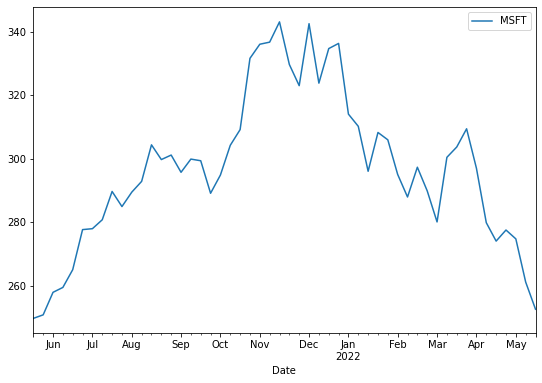

In [8]:
df.plot(y='MSFT', figsize=(9,6))

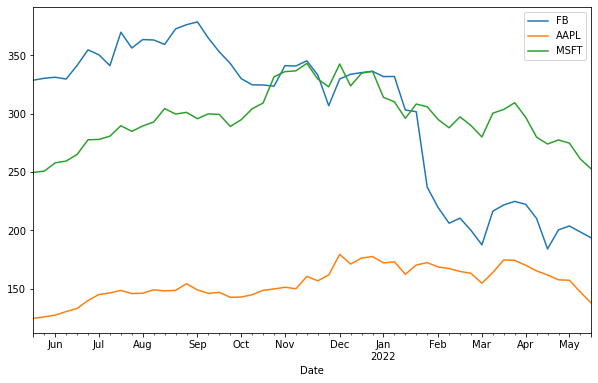

In [9]:
df.plot.line(y=['FB', 'AAPL', 'MSFT'], figsize=(10,6))

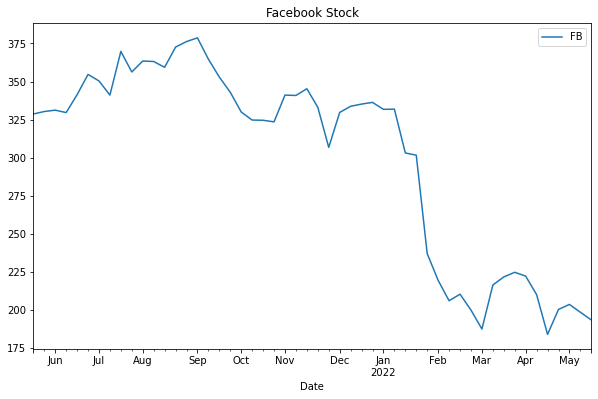

In [14]:
df.plot(y='FB', figsize=(10,6), title='Facebook Stock')

In [15]:
df_3Months = df.resample(rule='M').mean()[-3:]
print(df_3Months)

                  MSFT          FB        AAPL
Date                                          
2022-03-31  298.400001  212.692505  166.934998
2022-04-30  282.087494  204.272499  163.704994
2022-05-31  262.803335  198.643331  147.326665


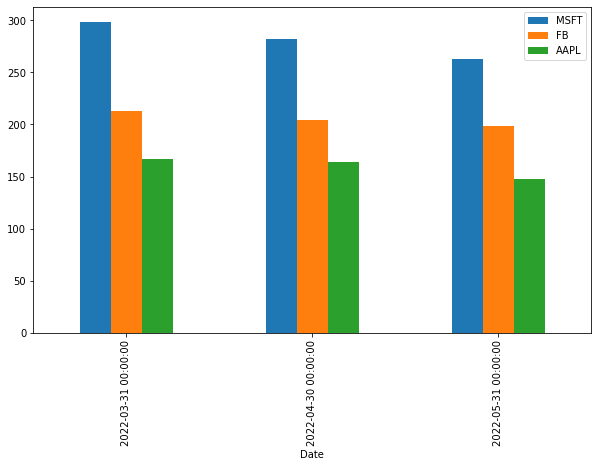

In [17]:
df_3Months.plot(kind='bar', figsize=(10,6))

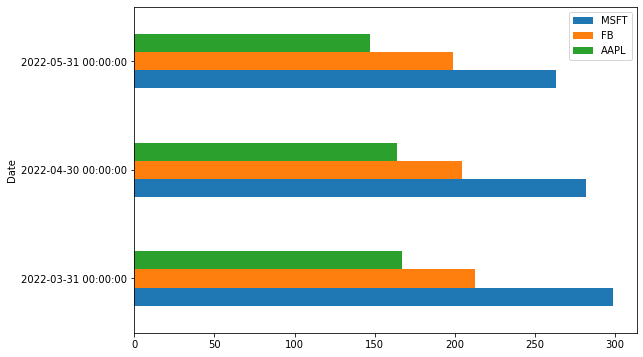

In [18]:
df_3Months.plot(kind='barh', figsize=(9,6))

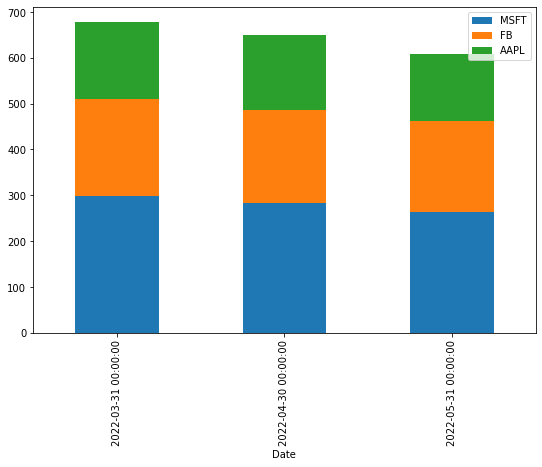

In [19]:
df_3Months.plot(kind='bar', stacked=True, figsize=(9,6))

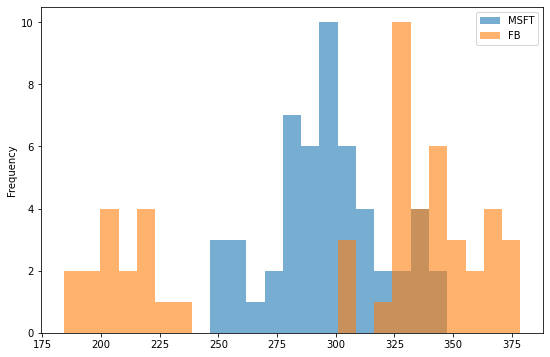

In [20]:
df[['MSFT', 'FB']].plot(kind='hist', bins=25, alpha=0.6, figsize=(9,6))

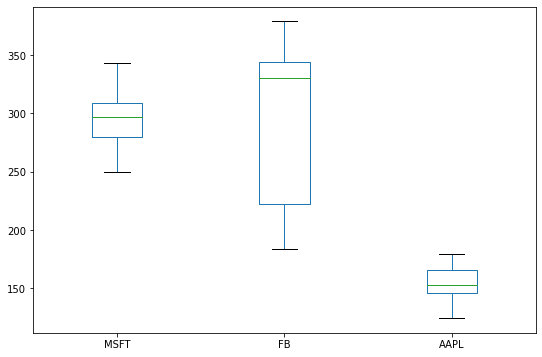

In [22]:
df.plot(kind='box', figsize=(9,6))

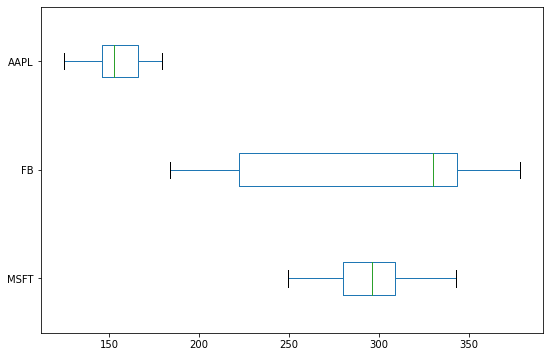

In [23]:
df.plot(kind='box', vert=False, figsize=(9,6))

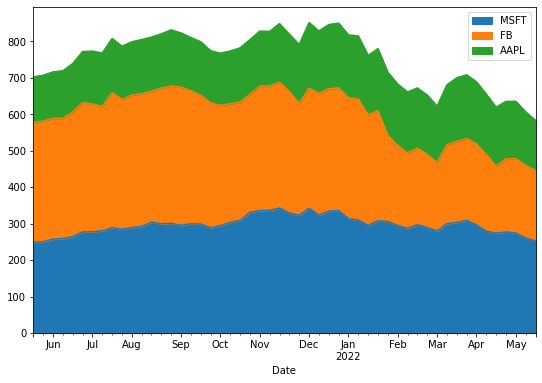

In [24]:
df.plot(kind='area', figsize=(9,6))

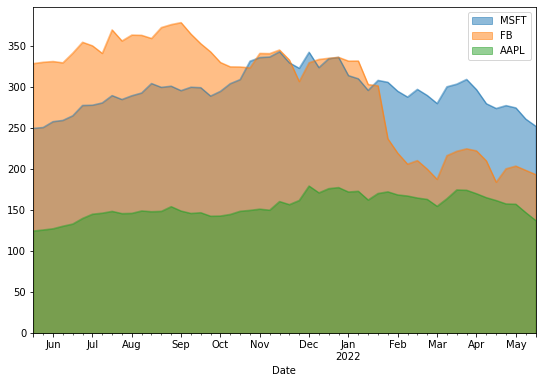

In [25]:
df.plot(kind='area', stacked=False, figsize=(9,6))

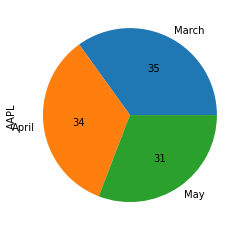

In [26]:
df_3Months.index=['March', 'April', 'May']
df_3Months.plot(kind='pie', y='AAPL', legend=False, autopct='%.f')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002768695EB50>,
      dtype=object)

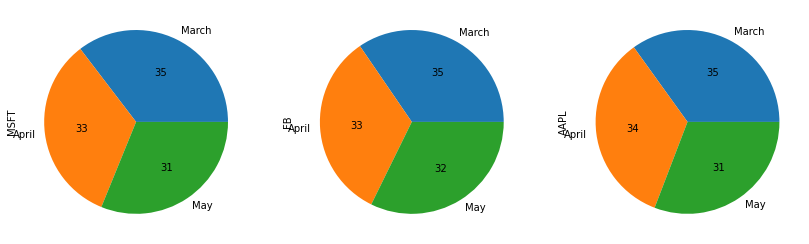

In [27]:
df_3Months.plot(kind='pie', legend=False, autopct='%.f', subplots=True, figsize=(14,8))

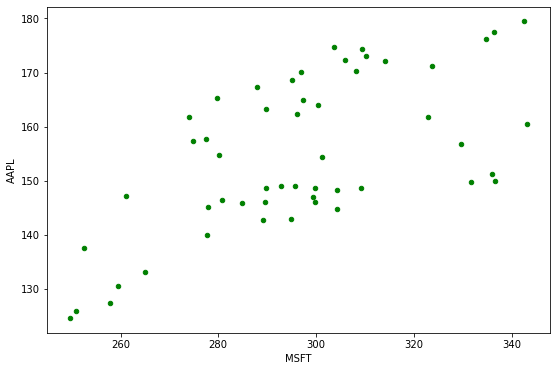

In [28]:
df.plot(kind='scatter', x='MSFT', y='AAPL', figsize=(9,6), color='Green')

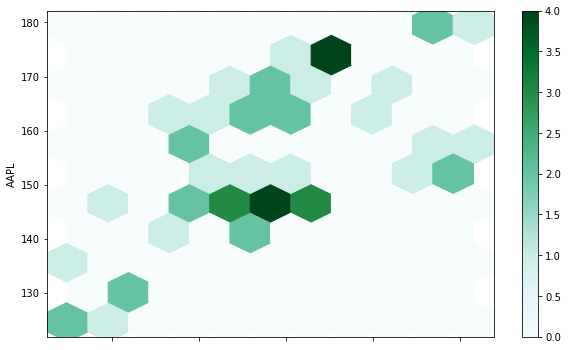

In [29]:
df.plot(kind='hexbin', x='MSFT', y='AAPL', gridsize=10, figsize=(10,6))